In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def sobel_operator(image):

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


    gray_image = image.convert('L')
    img_array = np.array(gray_image)


    gradient_x = convolve(img_array, kernel_x)
    gradient_y = convolve(img_array, kernel_y)


    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    return gradient_magnitude, gradient_direction

In [ ]:
def convolve(image, kernel):

    image_height, image_width = image.shape
    kernel_size = len(kernel)
    pad_size = kernel_size // 2
    result = np.zeros((image_height, image_width))


    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)

    return result

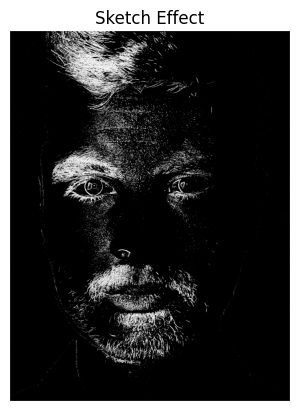

In [ ]:
def apply_sketch_effect(image_path, output_path):

    image = Image.open(image_path)

    gradient_magnitude, _ = sobel_operator(image)

    threshold = 50
    edges = (gradient_magnitude > threshold) * 255

    sketch_effect = edges

    sketch_effect = edges.astype(np.uint8)

    plt.imshow(sketch_effect, cmap='gray')
    plt.title('Sketch Effect')
    plt.axis('off')
    plt.show()
    Image.fromarray(sketch_effect).save(output_path)

input_image_path = '/content/drive/MyDrive/Computer Vision Project/input (2).jpg'
output_sketch_path = 'output_sketch_effect.png'
apply_sketch_effect(input_image_path, output_sketch_path)


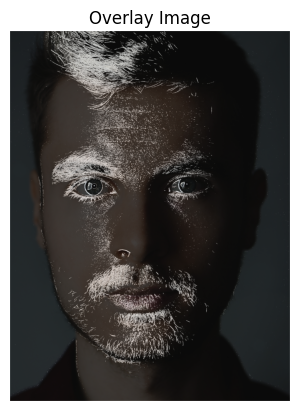

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def overlay_images(background_path, overlay_path, output_path, alpha=0.7):

    background = Image.open(background_path)

    overlay = Image.open(overlay_path).convert('L')

    background_array = np.array(background)
    overlay_array = np.array(overlay)

    alpha_channel = np.ones((background_array.shape[0], background_array.shape[1], 1)) * alpha
    overlay_array_with_alpha = np.concatenate((overlay_array[:, :, np.newaxis], alpha_channel), axis=2)

    blended_array = (1 - overlay_array_with_alpha[:, :, 1:]) * background_array + \
                    overlay_array_with_alpha[:, :, :1] * overlay_array_with_alpha[:, :, 1:]

    blended_array = np.clip(blended_array, 0, 255).astype(np.uint8)

    blended_image = Image.fromarray(blended_array)

    blended_image.save(output_path)

    plt.imshow(blended_image)
    plt.title('Overlay Image')
    plt.axis('off')
    plt.show()


background_image_path = '/content/drive/MyDrive/Computer Vision Project/input (2).jpg'
overlay_image_path = '/content/output_sketch_effect.png'
output_image_path = 'overlay_img.png'

overlay_images(background_image_path, overlay_image_path, output_image_path)


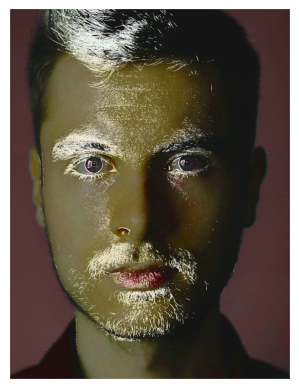

In [ ]:
import numpy as np
from PIL import Image
from skimage import color

def increase_saturation(image_path, output_path, factor=2):
    image = Image.open(image_path)

    img_array = np.array(image)

    hsv_image = color.rgb2hsv(img_array)

    # Doygunluğu artır
    hsv_image[:, :, 1] *= 2

    hsv_image[:, :, 1] = np.minimum(hsv_image[:, :, 1], 1.0)

    # Parlaklığı artır
    hsv_image[:, :, 2] *= 2

    hsv_image[:, :, 2] = np.minimum(hsv_image[:, :, 2], 1.0)

    hsv_image[:, :, 0] *= factor

    # 1'den büyük değerleri 1'e sabitle
    hsv_image[:, :, 0] = np.minimum(hsv_image[:, :, 0], 1.0)

    rgb_image = color.hsv2rgb(hsv_image)

    output_image = Image.fromarray((rgb_image * 255).astype(np.uint8))

    output_image.save(output_path)

    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

input_image_path = 'overlay_img.png'
output_image_path = 'output_image_increased_saturation.jpg'
increase_saturation(input_image_path, output_image_path, factor=2)


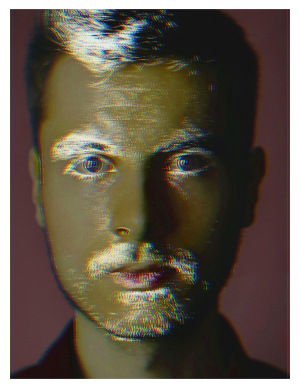

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def merge(blue_channel, green_channel, red_channel):

    merged_image = np.zeros((blue_channel.shape[0], blue_channel.shape[1], 3), dtype=np.uint8)
    merged_image[:,:,0] = blue_channel
    merged_image[:,:,1] = green_channel
    merged_image[:,:,2] = red_channel
    return merged_image

def apply_chromatic_aberration(image_path, output_path, shift_amount=25):

    image = cv2.imread(image_path)

    blue_channel, green_channel, red_channel = cv2.split(image)

    shifted_blue_channel = np.roll(blue_channel, shift_amount, axis=1)
    shifted_red_channel = np.roll(red_channel, -shift_amount, axis=1)

    aberration_image = merge(shifted_blue_channel, green_channel, shifted_red_channel)

    plt.imshow(cv2.cvtColor(aberration_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.show()

    cv2.imwrite(output_path, aberration_image)

input_image_path = 'output_image_increased_saturation.jpg'
output_chromatic_aberration_path = 'output_chromatic_aberration.jpg'
apply_chromatic_aberration(input_image_path, output_chromatic_aberration_path)
